In [48]:
import numpy as np
import itertools as it
from functools import reduce
import sys
import networkx as nx

#### Перевірка на ациклічність

In [49]:
def acyclicity(r): 
    E = []
    # будуємо граф за матрицею
    for i in range(len(r)):
        for j in range(len(r)):
            if r[i][j] == 1:
                E.append((i+1,j+1))
    graph = {}
    for k, ir in it.groupby(sorted(E), key=lambda x: x[0]):
        graph[k] = {e for _, e in ir}

    # виділяємо всі вершини, що УМОВА: містять тільки дуги що входять
    # або тільки дуги що виходять
    sub_graph = {}
    while True:
        vertex_set = set(graph).intersection(it.chain.from_iterable(graph.values()))
        sub_graph = {k: vertex_set & vs for k, vs in graph.items()
                     if k in vertex_set and vertex_set & vs}
        # перевіряємо, чи підграф з вершин, що відповідають УМОВІ співпадає з заданим графом
        # так: заданий граф ациклічний
        # ні: заданий граф містить цикли
        if sub_graph == graph:
            break
        else:
            graph = sub_graph

    
    if graph:
        return False
    else:
        return True


#### k-оптимізація

In [50]:
def nonzero_vector(r):
    return [set(ai.nonzero()[0]) for i, ai in enumerate(r)]

#асиметрична частина
def P(r):
    return nonzero_vector(r * np.logical_not(r).transpose() * np.logical_not(np.eye(len(r))))
#симетрична частина
def I(r):
    return nonzero_vector(r * r.transpose() + np.eye(len(r)))
#відношення непорівнюваності
def N(r):
    return nonzero_vector(np.logical_not(r) * np.logical_not(r).transpose() * np.logical_not(np.eye(len(r))))

def sk_sets(r):
    p = P(r)
    i = I(r)
    n = N(r)
    #  k=1 : p[j] | i[j] | n[j]
    #  k=2 : p[j] | n[j]
    #  k=3 : p[j] | i[j]
    #  k=4 : p[j]
    return [[p[j] | i[j] | n[j], p[j] | n[j], p[j] | i[j], p[j]] for j in range(0, len(r))]

def get_i_max(Ski):
    a = set()
    for i, i_row in enumerate(Ski):
        for j, j_row in enumerate(Ski):
            if i_row < j_row:
                break
        else:
            a.add(i)
    return a

def k_max(Sk):
    return [get_i_max(Sk[:, i]) for i in range(0, 4)]


#### Оптимізація за Нейманом-Моргенштерном

Алгоритм для ациклічних відношень

In [51]:
# виділяємо верхні перерізи відношення
def upper_section(r, idx):
    return set(r[:, idx].nonzero()[0])

# побудова множини Si
def s_sets(r):
    S = [set()]
    while S[-1] != set(range(0, len(r))):  
        S.append(set([i for i in range(0, len(r)) if upper_section(r, i) - set([i]) <= S[-1]]))
    return S

def neuman_morgenstern(r):
    C = s_sets(r) 
    elements = np.hstack(map(lambda i: list(C[i] - C[i-1]), range(1, len(C))))
    return reduce(lambda s, i: s | {i} if not upper_section(r, i) & s else s, elements, set()) 

    

#### Читання та візуалізація графів

Примітка: номер_вершини = реальний_номер_вершини - 1

In [52]:
with open ("relations.txt", 'r') as data: 
    relations = [[int(x) for x in line.split()] for line in data]
    
make_R = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
Relation = make_R(relations, 15)

Відношення 1:

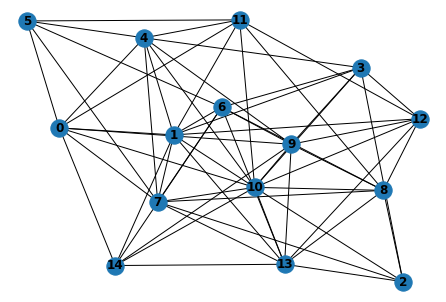

In [53]:
matrix1 = np.array(Relation[0])
G1 = nx.Graph()
for i in range(len(matrix1)):
    G1.add_node(i)
    for j in range(len(matrix1)):
        if matrix1[i][j] == 1:
            G1.add_edge(*(i,j))
nx.draw(G1, with_labels=True, font_weight='bold')

Відношення 2:

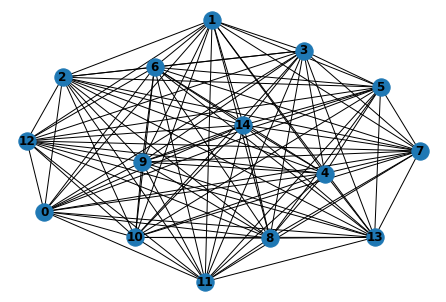

In [54]:
matrix2 = np.array(Relation[1])
G2 = nx.Graph()
for i in range(len(matrix2)):
    G2.add_node(i)
    for j in range(len(matrix2)):
        if matrix2[i][j] == 1:
            G2.add_edge(*(i,j))
nx.draw(G2, with_labels=True, font_weight='bold')

Відношення 3:

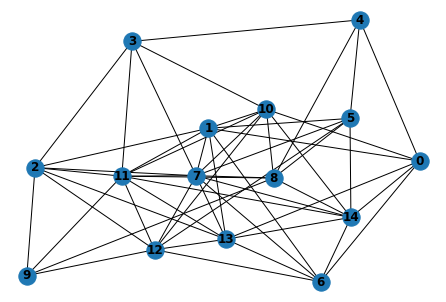

In [55]:
matrix3 = np.array(Relation[2])
G3 = nx.Graph()
for i in range(len(matrix3)):
    G3.add_node(i)
    for j in range(len(matrix3)):
        if matrix3[i][j] == 1:
            G3.add_edge(*(i,j))
nx.draw(G3, with_labels=True, font_weight='bold')

Відношення 4:

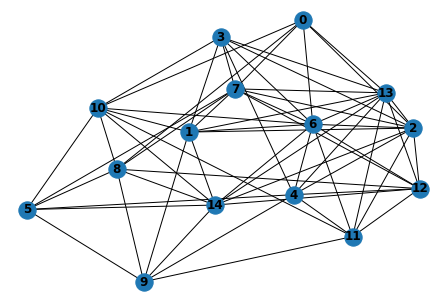

In [56]:
matrix4 = np.array(Relation[3])
G4 = nx.Graph()
for i in range(len(matrix4)):
    G4.add_node(i)
    for j in range(len(matrix4)):
        if matrix4[i][j] == 1:
            G4.add_edge(*(i,j))
nx.draw(G4, with_labels=True, font_weight='bold')

Відношення 5:

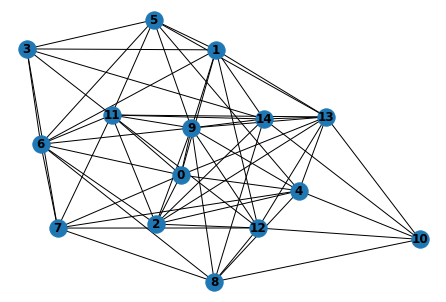

In [57]:
matrix5 = np.array(Relation[4])
G5 = nx.Graph()
for i in range(len(matrix5)):
    G5.add_node(i)
    for j in range(len(matrix5)):
        if matrix5[i][j] == 1:
            G5.add_edge(*(i,j))
nx.draw(G5, with_labels=True, font_weight='bold')

Відношення 6:

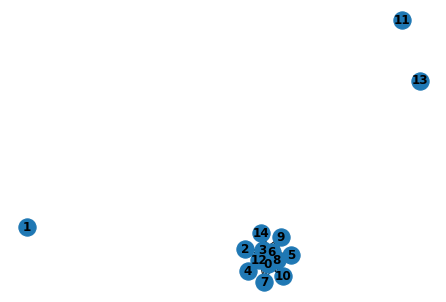

In [58]:
matrix6 = np.array(Relation[5])
G6 = nx.Graph()
for i in range(len(matrix6)):
    G6.add_node(i)
    for j in range(len(matrix6)):
        if matrix6[i][j] == 1:
            G6.add_edge(*(i,j))
nx.draw(G6, with_labels=True, font_weight='bold')

Відношення 7:

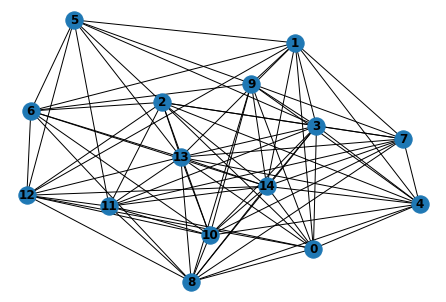

In [59]:
matrix7 = np.array(Relation[6])
G7 = nx.Graph()
for i in range(len(matrix7)):
    G7.add_node(i)
    for j in range(len(matrix7)):
        if matrix7[i][j] == 1:
            G7.add_edge(*(i,j))
nx.draw(G7, with_labels=True, font_weight='bold')

Відношення 8:

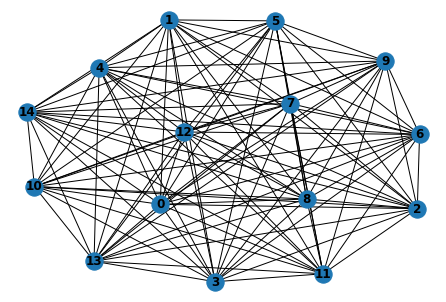

In [60]:
matrix8 = np.array(Relation[7])
G8 = nx.Graph()
for i in range(len(matrix8)):
    G8.add_node(i)
    for j in range(len(matrix8)):
        if matrix8[i][j] == 1:
            G8.add_edge(*(i,j))
nx.draw(G8, with_labels=True, font_weight='bold')

Відношення 9:

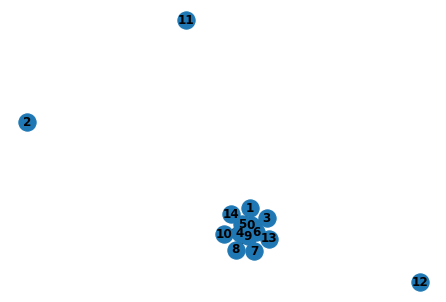

In [61]:
matrix9 = np.array(Relation[8])
G9 = nx.Graph()
for i in range(len(matrix9)):
    G9.add_node(i)
    for j in range(len(matrix9)):
        if matrix9[i][j] == 1:
            G9.add_edge(*(i,j))
nx.draw(G9, with_labels=True, font_weight='bold')

Відношення 10:

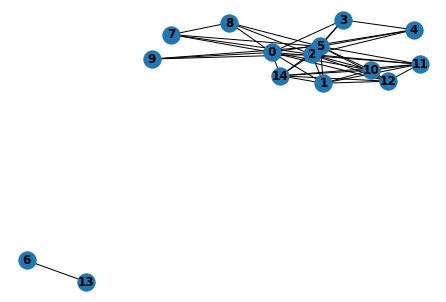

In [62]:
matrix10 = np.array(Relation[9])
G10 = nx.Graph()
for i in range(len(matrix10)):
    G10.add_node(i)
    for j in range(len(matrix10)):
        if matrix10[i][j] == 1:
            G10.add_edge(*(i,j))
nx.draw(G10, with_labels=True, font_weight='bold')

#### Результати роботи програми

In [63]:
def print_set(s):
    return "{" + ", ".join(str(v+1) for v in list(s)) + "}"

def print_result(s):
    return print_set(s)

In [64]:
for i, rel in zip(range(len(Relation)),Relation):
    current_relation = np.array(rel)
    print("Відношення R{}:".format(i+1))
    if acyclicity(current_relation):       
        print ("--Ациклічне")
        print ("--Оптимізація за Нейманом-Моргенштерном:{}".format(print_result(neuman_morgenstern(current_relation))))
    else:
        print ("--Містить цикли")
        a = np.array(sk_sets(current_relation))
        print ("--Множини k-оптимальних альтернатив:")
        print ([print_result(x) for x in k_max(a)])
    print ("")

Відношення R1:
--Ациклічне
--Оптимізація за Нейманом-Моргенштерном:{2, 3, 6, 10}

Відношення R2:
--Містить цикли
--Множини k-оптимальних альтернатив:
['{4, 5, 6, 11, 12, 13}', '{4, 5, 6, 11, 12, 13}', '{4, 5, 6, 11, 12, 13}', '{4, 5, 6, 11, 12, 13}']

Відношення R3:
--Ациклічне
--Оптимізація за Нейманом-Моргенштерном:{1, 3, 6}

Відношення R4:
--Ациклічне
--Оптимізація за Нейманом-Моргенштерном:{1, 2, 5}

Відношення R5:
--Ациклічне
--Оптимізація за Нейманом-Моргенштерном:{1, 9, 4}

Відношення R6:
--Містить цикли
--Множини k-оптимальних альтернатив:
['{2, 4, 9, 12, 13, 14}', '{2, 4, 9, 12, 13, 14}', '{2, 4, 9, 12, 13, 14}', '{9, 4, 13}']

Відношення R7:
--Містить цикли
--Множини k-оптимальних альтернатив:
['{1, 2, 3, 5, 6, 7, 8, 9, 10, 11}', '{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}', '{1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15}', '{1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15}']

Відношення R8:
--Містить цикли
--Множини k-оптимальних альтернатив:
['{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,

c:\users\teraz\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
